[![img](..\ep8_2018-57x57.png)](http://endlesspint.com/)

# Rafa v Fed, Wimbledon '08 Simulation

**post @** [endlesspint.com](http://endlesspint.com/2019-06-21-rafa-fed-wimbledon-2008-simulation/)

In [1]:
import numpy as np
import pandas as pd

In [2]:
class Player():
    def __init__(self, name, fsp_in, fsp_win, ssp_win):
        self.name = name
        self.fsp_in = fsp_in # first serve percentage in
        self.fsp_win = fsp_win # first serve percentage win
        self.ssp_win = ssp_win # second serve percentage win

In [3]:
rafa = Player("Rafa", .73, .69, .59)
fedr = Player("Fed" , .65, .73, .57)

rafa.fsp_in, fedr.ssp_win

(0.73, 0.57)

## notes

* Fed started off the match serving

In [4]:
def serving_game(serving_player):
    
    server_score = 0
    receiver_score = 0
    
    score_max = np.max((server_score, receiver_score))
    score_min = np.min((server_score, receiver_score))
    score_dif = score_max - score_min
    
    # count:
        # first serves in
        # first serves win
        # second serve wins
        # total points/player
        # receiving points won
        # break points
            # faced
            # converted
    
    while score_max < 4 or score_dif < 2:
    
        if np.random.rand() < serving_player.fsp_in:
            if np.random.rand() < serving_player.fsp_win:
                server_score += 1
            else:
                receiver_score += 1
        else:
            if np.random.rand() < serving_player.ssp_win:
                server_score += 1
            else:
                receiver_score += 1
                
        score_max = np.max((server_score, receiver_score))
        score_min = np.min((server_score, receiver_score))
        score_dif = score_max - score_min
        
    hold_serve = [1 if server_score > receiver_score else 0][0]
            
    return hold_serve, server_score, receiver_score


for i in range(10):
    print(serving_game(fedr))

(1, 4, 2)
(1, 4, 1)
(1, 4, 0)
(1, 4, 0)
(1, 4, 0)
(1, 4, 1)
(1, 4, 2)
(0, 4, 6)
(1, 4, 0)
(1, 4, 1)


In [5]:
def tiebreak(serving_list, serving_cnt):
    
    orig_serving_turn = serving_cnt % 2
    serving_turn = serving_cnt % 2
    serving_player = serving_list[serving_turn]
    
    orig_receiving_turn = 1 - serving_turn
    receiving_turn = 1 - serving_turn
    
    player_score_list = ['p1_tiebreak_score', 'p2_tiebreak_score']
    player_score_dict = {'p1_tiebreak_score': 0, 'p2_tiebreak_score': 0}
    
    
    score_max = np.max((player_score_dict['p1_tiebreak_score'], player_score_dict['p2_tiebreak_score']))
    score_min = np.min((player_score_dict['p1_tiebreak_score'], player_score_dict['p2_tiebreak_score']))
    score_dif = score_max - score_min
    
    pts_played = np.sum((player_score_dict['p1_tiebreak_score'], player_score_dict['p2_tiebreak_score']))
    
    while score_max < 7 or score_dif < 2:
    
        if np.random.rand() < serving_player.fsp_in:
            if np.random.rand() < serving_player.fsp_win:
                player_score_dict[player_score_list[serving_turn]] += 1
            else:
                player_score_dict[player_score_list[receiving_turn]] += 1
        else:
            if np.random.rand() < serving_player.ssp_win:
                player_score_dict[player_score_list[serving_turn]] += 1
            else:
                player_score_dict[player_score_list[receiving_turn]] += 1
                
        pts_played += 1
        
        if pts_played % 2 > 0:
            serving_turn = 1 - serving_turn
            receiving_turn = 1 - serving_turn
                
        score_max = np.max((player_score_dict['p1_tiebreak_score'], player_score_dict['p2_tiebreak_score']))
        score_min = np.min((player_score_dict['p1_tiebreak_score'], player_score_dict['p2_tiebreak_score']))
        score_dif = score_max - score_min
        
    hold_serve = [1 if player_score_dict[player_score_list[orig_serving_turn]] > player_score_dict[player_score_list[orig_receiving_turn]] else 0][0]
    
            
    return hold_serve, player_score_dict['p1_tiebreak_score'], player_score_dict['p2_tiebreak_score']


for i in range(10):
    print(tiebreak([fedr, rafa], 1))

(1, 5, 7)
(1, 3, 7)
(0, 7, 2)
(1, 5, 7)
(1, 5, 7)
(0, 7, 4)
(1, 3, 7)
(0, 7, 3)
(1, 6, 8)
(0, 12, 10)


In [6]:
def serve_alternating(serving_cnt, serving_list, player_score_list, player_score_dict):
    
    serving_turn = serving_cnt % 2
    serving_player = serving_list[serving_turn]

    serve_held = serving_game(serving_player)[0]
    serve_broken = 1 - serve_held

    player_score_dict[player_score_list[serving_turn]] += serve_held
    serving_cnt += 1
    serving_turn = serving_cnt % 2
    player_score_dict[player_score_list[serving_turn]] += serve_broken

    score_max = np.max((player_score_dict['player1_score'], player_score_dict['player2_score']))
    score_min = np.min((player_score_dict['player1_score'], player_score_dict['player2_score']))
    score_dif = score_max - score_min
    
    return score_max, score_min, score_dif, serving_cnt



# VALID_SERVING_ORDER = {0, 1}

def set_(player1, player2, serving_cnt = 0, tiebreaker=True):
    
#     if serving_order not in VALID_SERVING_ORDER:
#         raise ValueError("set_: serving_order must be one of %r." % VALID_SERVING_ORDER)
    
    serving_list = [player1, player2]
    serving_cnt = serving_cnt
    
    player_score_list = ['player1_score', 'player2_score']
    player_score_dict = {'player1_score': 0, 'player2_score': 0}
    
    score_max = np.max((player_score_dict['player1_score'], player_score_dict['player2_score']))
    score_min = np.min((player_score_dict['player1_score'], player_score_dict['player2_score']))
    score_dif = score_max - score_min
    
    if tiebreaker:
        
        while score_max < 6:
            
            score_max, score_min, score_dif, serving_cnt = serve_alternating(serving_cnt, serving_list, player_score_list, player_score_dict)          
#             print(serving_cnt)
            
        if score_dif < 2:

            score_max, score_min, score_dif, serving_cnt = serve_alternating(serving_cnt, serving_list, player_score_list, player_score_dict)
#             print(serving_cnt)

        if score_max == score_min == 6:
            
            tiebreak_1st_to_serve = serving_cnt % 2
            tiebreak_1st_to_receive = 1 - tiebreak_1st_to_serve
            
            tiebreak_hold = (tiebreak(serving_list, serving_cnt))[0]
            tiebreak_break = 1 - tiebreak_hold
            
            player_score_dict[player_score_list[tiebreak_1st_to_serve]] += tiebreak_hold
            player_score_dict[player_score_list[tiebreak_1st_to_receive]] += tiebreak_break
            
            serving_cnt += 1
            
#             print("TIEBREAKER!")
#             print("Starting the tiebreaker, serving: %s" % serving_list[tiebreak_1st_to_serve].name)
#             print(serving_cnt)
    else:
        
        while score_max < 6 or score_dif < 2:
            
            score_max, score_min, score_dif, serving_cnt = serve_alternating(serving_cnt, serving_list, player_score_list, player_score_dict)
#             print(serving_cnt)
    
    return player_score_dict, serving_cnt
    
set_(fedr, rafa, 0, tiebreaker=True)

({'player1_score': 2, 'player2_score': 6}, 8)

In [7]:
VALID_SERVING_ORDER = {0, 1}

def match_(player1, player2, best_of = 5, serving_order = 0, final_set_tiebreaker = True, verbose = False): 
    
    if serving_order not in VALID_SERVING_ORDER:
        raise ValueError("set_: serving_order must be one of %r." % VALID_SERVING_ORDER)
        
    serving_cnt = serving_order
    
    player1_games = {x:0 for x in range(1, best_of + 1)}
    player2_games = {x:0 for x in range(1, best_of + 1)}
    
    player1_sets = 0
    player2_sets = 0
    
    cur_set = 1
    
    set_max = np.max((player1_sets, player2_sets))
    
    while set_max < (best_of // 2) + 1:
    
        if cur_set == best_of and final_set_tiebreaker == False:
            set_outcome = set_(player1, player2, serving_cnt, tiebreaker=False)
            set_score, serving_cnt = set_outcome[0], set_outcome[1]
        else:
            set_outcome = set_(player1, player2, serving_cnt)
            set_score, serving_cnt = set_outcome[0], set_outcome[1]
        
        player1_games[cur_set], player2_games[cur_set] = set_score['player1_score'], set_score['player2_score']

        if player1_games[cur_set] > player2_games[cur_set]:
            player1_sets += 1
        else:
            player2_sets += 1
            
        set_max = np.max((player1_sets, player2_sets))

        cur_set += 1
        
    if verbose:
        if player1_sets > player2_sets:
            return player1_games, player2_games, player1.name, cur_set - 1
        else:
            return player1_games, player2_games, player2.name, cur_set - 1
    
    return player1_games, player2_games

match_(fedr, rafa, final_set_tiebreaker=False)

({1: 6, 2: 6, 3: 7, 4: 6, 5: 0}, {1: 7, 2: 7, 3: 6, 4: 7, 5: 0})

In [8]:
match_temp = match_(fedr, rafa, final_set_tiebreaker=False, verbose=True)
match_temp

({1: 4, 2: 7, 3: 7, 4: 6, 5: 0}, {1: 6, 2: 6, 3: 5, 4: 3, 5: 0}, 'Fed', 4)

In [9]:
pd.DataFrame([match_temp[0], match_temp[1]])

,1,2,3,4,5
0,4,7,7,6,0
1,6,6,5,3,0


In [10]:
match_temp[2:]

('Fed', 4)

## Let's run it back, several thousand times

In [11]:
np.random.seed(8)

match_list = []

for i in range(10000):
    match_list.append(match_(fedr, rafa, final_set_tiebreaker=False, verbose=True))

In [12]:
match_list[:10], match_list[-10:]

([({1: 7, 2: 6, 3: 3, 4: 6, 5: 0}, {1: 6, 2: 4, 3: 6, 4: 3, 5: 0}, 'Fed', 4),
  ({1: 5, 2: 7, 3: 6, 4: 6, 5: 0}, {1: 7, 2: 6, 3: 2, 4: 2, 5: 0}, 'Fed', 4),
  ({1: 6, 2: 7, 3: 7, 4: 0, 5: 0}, {1: 3, 2: 5, 3: 6, 4: 0, 5: 0}, 'Fed', 3),
  ({1: 6, 2: 7, 3: 7, 4: 6, 5: 6}, {1: 7, 2: 6, 3: 6, 4: 7, 5: 4}, 'Fed', 5),
  ({1: 4, 2: 4, 3: 4, 4: 0, 5: 0}, {1: 6, 2: 6, 3: 6, 4: 0, 5: 0}, 'Rafa', 3),
  ({1: 6, 2: 6, 3: 7, 4: 0, 5: 0}, {1: 3, 2: 4, 3: 5, 4: 0, 5: 0}, 'Fed', 3),
  ({1: 7, 2: 6, 3: 6, 4: 0, 5: 0}, {1: 6, 2: 4, 3: 4, 4: 0, 5: 0}, 'Fed', 3),
  ({1: 6, 2: 7, 3: 6, 4: 0, 5: 0}, {1: 3, 2: 5, 3: 4, 4: 0, 5: 0}, 'Fed', 3),
  ({1: 6, 2: 6, 3: 6, 4: 0, 5: 0}, {1: 3, 2: 4, 3: 4, 4: 0, 5: 0}, 'Fed', 3),
  ({1: 6, 2: 2, 3: 4, 4: 6, 5: 8}, {1: 4, 2: 6, 3: 6, 4: 4, 5: 6}, 'Fed', 5)],
 [({1: 6, 2: 6, 3: 6, 4: 6, 5: 6}, {1: 3, 2: 4, 3: 7, 4: 7, 5: 4}, 'Fed', 5),
  ({1: 6, 2: 7, 3: 7, 4: 0, 5: 0}, {1: 2, 2: 6, 3: 6, 4: 0, 5: 0}, 'Fed', 3),
  ({1: 6, 2: 3, 3: 6, 4: 0, 5: 0}, {1: 7, 2: 6, 3: 7, 4: 0, 5:

In [13]:
# match_temp = match_(fedr, rafa, final_set_tiebreaker=False)
pd.DataFrame.from_dict({'fedr': list(match_temp[0].values()), 'rafa': list(match_temp[1].values())}, orient='index')

,0,1,2,3,4
fedr,4,7,7,6,0
rafa,6,6,5,3,0


In [14]:
df_match_list = pd.DataFrame(match_list)
df_match_list.columns = ['fedr_games', 'rafa_games', 'winner', 'sets_needed']

df_match_list.head(5)

,fedr_games,rafa_games,winner,sets_needed
0,"{1: 7, 2: 6, 3: 3, 4: 6, 5: 0}","{1: 6, 2: 4, 3: 6, 4: 3, 5: 0}",Fed,4
1,"{1: 5, 2: 7, 3: 6, 4: 6, 5: 0}","{1: 7, 2: 6, 3: 2, 4: 2, 5: 0}",Fed,4
2,"{1: 6, 2: 7, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 6, 4: 0, 5: 0}",Fed,3
3,"{1: 6, 2: 7, 3: 7, 4: 6, 5: 6}","{1: 7, 2: 6, 3: 6, 4: 7, 5: 4}",Fed,5
4,"{1: 4, 2: 4, 3: 4, 4: 0, 5: 0}","{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}",Rafa,3


In [15]:
df_match_list.winner.value_counts()

Fed     5533
Rafa    4467
Name: winner, dtype: int64

In [16]:
np.array(df_match_list.winner == 'Fed').astype(int).reshape(100,100)

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 0]])

## Vis all 10k results

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

[]

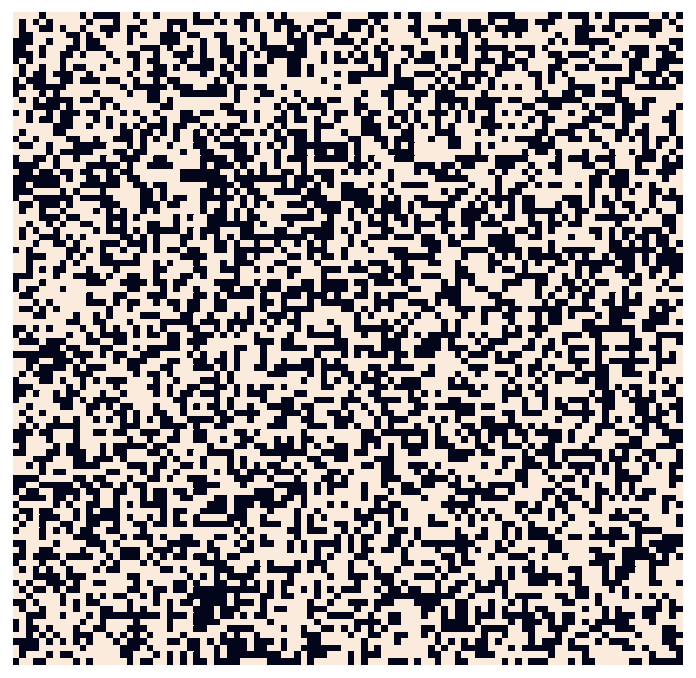

In [18]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(np.array(df_match_list.winner == 'Fed').astype(int).reshape(100,100), cbar=False)

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

## Profile of wins by set total

In [19]:
df_match_list.groupby(['winner', 'sets_needed']).count()['fedr_games']#.plot.bar()

winner  sets_needed
Fed     3              1520
        4              2053
        5              1960
Rafa    3              1076
        4              1682
        5              1709
Name: fedr_games, dtype: int64

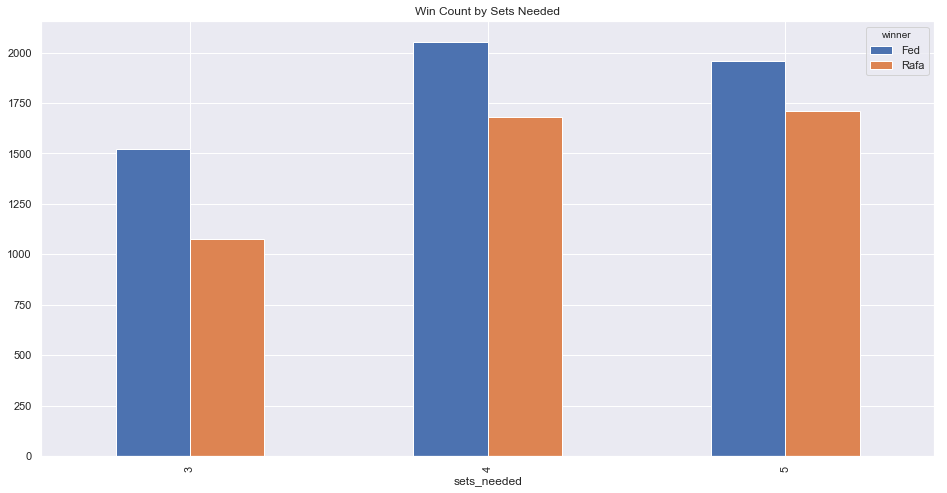

In [20]:
df_match_list.pivot_table(index='sets_needed', columns='winner', aggfunc='count')['fedr_games'].plot.bar(figsize=(16,8), title="Win Count by Sets Needed")

In [21]:
df_match_list.winner.head()

0     Fed
1     Fed
2     Fed
3     Fed
4    Rafa
Name: winner, dtype: object

## How streaky can 'coin flips' be?

In [22]:
df_match_list['streak'] = 1
df_match_list.head()

,fedr_games,rafa_games,winner,sets_needed,streak
0,"{1: 7, 2: 6, 3: 3, 4: 6, 5: 0}","{1: 6, 2: 4, 3: 6, 4: 3, 5: 0}",Fed,4,1
1,"{1: 5, 2: 7, 3: 6, 4: 6, 5: 0}","{1: 7, 2: 6, 3: 2, 4: 2, 5: 0}",Fed,4,1
2,"{1: 6, 2: 7, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 6, 4: 0, 5: 0}",Fed,3,1
3,"{1: 6, 2: 7, 3: 7, 4: 6, 5: 6}","{1: 7, 2: 6, 3: 6, 4: 7, 5: 4}",Fed,5,1
4,"{1: 4, 2: 4, 3: 4, 4: 0, 5: 0}","{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}",Rafa,3,1


In [23]:
for i, row in df_match_list.iterrows():
    if i != 0:
        if row['winner'] == df_match_list.loc[i-1, 'winner']:
            df_match_list.loc[i, 'streak'] = df_match_list.loc[i-1, 'streak'] + 1
            
df_match_list.head(20)

,fedr_games,rafa_games,winner,sets_needed,streak
0,"{1: 7, 2: 6, 3: 3, 4: 6, 5: 0}","{1: 6, 2: 4, 3: 6, 4: 3, 5: 0}",Fed,4,1
1,"{1: 5, 2: 7, 3: 6, 4: 6, 5: 0}","{1: 7, 2: 6, 3: 2, 4: 2, 5: 0}",Fed,4,2
2,"{1: 6, 2: 7, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 6, 4: 0, 5: 0}",Fed,3,3
3,"{1: 6, 2: 7, 3: 7, 4: 6, 5: 6}","{1: 7, 2: 6, 3: 6, 4: 7, 5: 4}",Fed,5,4
4,"{1: 4, 2: 4, 3: 4, 4: 0, 5: 0}","{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}",Rafa,3,1
5,"{1: 6, 2: 6, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 4, 3: 5, 4: 0, 5: 0}",Fed,3,1
6,"{1: 7, 2: 6, 3: 6, 4: 0, 5: 0}","{1: 6, 2: 4, 3: 4, 4: 0, 5: 0}",Fed,3,2
7,"{1: 6, 2: 7, 3: 6, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 4, 4: 0, 5: 0}",Fed,3,3
8,"{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}","{1: 3, 2: 4, 3: 4, 4: 0, 5: 0}",Fed,3,4
9,"{1: 6, 2: 2, 3: 4, 4: 6, 5: 8}","{1: 4, 2: 6, 3: 6, 4: 4, 5: 6}",Fed,5,5


In [24]:
df_match_list['end_of_streak'] = 0
df_match_list.head()

,fedr_games,rafa_games,winner,sets_needed,streak,end_of_streak
0,"{1: 7, 2: 6, 3: 3, 4: 6, 5: 0}","{1: 6, 2: 4, 3: 6, 4: 3, 5: 0}",Fed,4,1,0
1,"{1: 5, 2: 7, 3: 6, 4: 6, 5: 0}","{1: 7, 2: 6, 3: 2, 4: 2, 5: 0}",Fed,4,2,0
2,"{1: 6, 2: 7, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 6, 4: 0, 5: 0}",Fed,3,3,0
3,"{1: 6, 2: 7, 3: 7, 4: 6, 5: 6}","{1: 7, 2: 6, 3: 6, 4: 7, 5: 4}",Fed,5,4,0
4,"{1: 4, 2: 4, 3: 4, 4: 0, 5: 0}","{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}",Rafa,3,1,0


In [25]:
final_row_num = df_match_list.shape[0] - 1

for i, row in df_match_list.iterrows():
    if i != final_row_num:
        if row['winner'] != df_match_list.loc[i+1, 'winner']:
            df_match_list.loc[i, 'end_of_streak'] = 1
    else:
        df_match_list.loc[i, 'end_of_streak'] = 1
        
df_match_list.head(20)

,fedr_games,rafa_games,winner,sets_needed,streak,end_of_streak
0,"{1: 7, 2: 6, 3: 3, 4: 6, 5: 0}","{1: 6, 2: 4, 3: 6, 4: 3, 5: 0}",Fed,4,1,0
1,"{1: 5, 2: 7, 3: 6, 4: 6, 5: 0}","{1: 7, 2: 6, 3: 2, 4: 2, 5: 0}",Fed,4,2,0
2,"{1: 6, 2: 7, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 6, 4: 0, 5: 0}",Fed,3,3,0
3,"{1: 6, 2: 7, 3: 7, 4: 6, 5: 6}","{1: 7, 2: 6, 3: 6, 4: 7, 5: 4}",Fed,5,4,1
4,"{1: 4, 2: 4, 3: 4, 4: 0, 5: 0}","{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}",Rafa,3,1,1
5,"{1: 6, 2: 6, 3: 7, 4: 0, 5: 0}","{1: 3, 2: 4, 3: 5, 4: 0, 5: 0}",Fed,3,1,0
6,"{1: 7, 2: 6, 3: 6, 4: 0, 5: 0}","{1: 6, 2: 4, 3: 4, 4: 0, 5: 0}",Fed,3,2,0
7,"{1: 6, 2: 7, 3: 6, 4: 0, 5: 0}","{1: 3, 2: 5, 3: 4, 4: 0, 5: 0}",Fed,3,3,0
8,"{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}","{1: 3, 2: 4, 3: 4, 4: 0, 5: 0}",Fed,3,4,0
9,"{1: 6, 2: 2, 3: 4, 4: 6, 5: 8}","{1: 4, 2: 6, 3: 6, 4: 4, 5: 6}",Fed,5,5,1


In [26]:
df_match_list.tail(20)

,fedr_games,rafa_games,winner,sets_needed,streak,end_of_streak
9980,"{1: 4, 2: 6, 3: 7, 4: 6, 5: 0}","{1: 6, 2: 4, 3: 6, 4: 4, 5: 0}",Fed,4,1,0
9981,"{1: 3, 2: 3, 3: 7, 4: 7, 5: 7}","{1: 6, 2: 6, 3: 6, 4: 6, 5: 5}",Fed,5,2,0
9982,"{1: 6, 2: 7, 3: 4, 4: 6, 5: 0}","{1: 3, 2: 6, 3: 6, 4: 4, 5: 0}",Fed,4,3,1
9983,"{1: 4, 2: 7, 3: 5, 4: 5, 5: 0}","{1: 6, 2: 6, 3: 7, 4: 7, 5: 0}",Rafa,4,1,1
9984,"{1: 1, 2: 7, 3: 4, 4: 6, 5: 6}","{1: 6, 2: 6, 3: 6, 4: 1, 5: 4}",Fed,5,1,1
9985,"{1: 6, 2: 4, 3: 6, 4: 1, 5: 4}","{1: 2, 2: 6, 3: 3, 4: 6, 5: 6}",Rafa,5,1,0
9986,"{1: 6, 2: 6, 3: 3, 4: 4, 5: 4}","{1: 3, 2: 2, 3: 6, 4: 6, 5: 6}",Rafa,5,2,1
9987,"{1: 4, 2: 6, 3: 6, 4: 6, 5: 0}","{1: 6, 2: 3, 3: 4, 4: 2, 5: 0}",Fed,4,1,0
9988,"{1: 6, 2: 6, 3: 7, 4: 6, 5: 0}","{1: 7, 2: 3, 3: 6, 4: 3, 5: 0}",Fed,4,2,0
9989,"{1: 6, 2: 6, 3: 6, 4: 0, 5: 0}","{1: 2, 2: 3, 3: 3, 4: 0, 5: 0}",Fed,3,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135A2CA05C0>]],
      dtype=object)

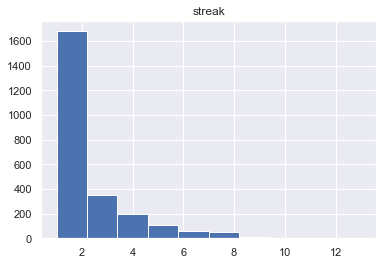

In [27]:
df_match_list.loc[(df_match_list.end_of_streak==1) & (df_match_list.winner=='Fed')][['winner', 'streak']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135A2C792B0>]],
      dtype=object)

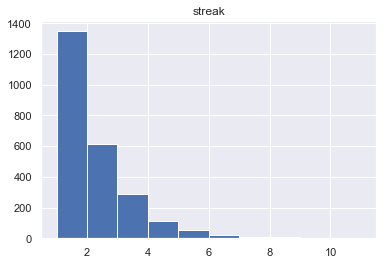

In [28]:
df_match_list.loc[(df_match_list.end_of_streak==1) & (df_match_list.winner=='Rafa')][['winner', 'streak']].hist()

In [29]:
df_match_list[df_match_list.end_of_streak==1].groupby(['winner', 'streak']).count()['end_of_streak']

winner  streak
Fed     1         1138
        2          540
        3          347
        4          193
        5          110
        6           63
        7           30
        8           21
        9           11
        10           6
        11           1
        13           2
Rafa    1         1348
        2          612
        3          291
        4          113
        5           55
        6           24
        7            9
        8            6
        9            1
        10           2
        11           1
Name: end_of_streak, dtype: int64

## Comp 1: other runs

In [44]:
sims = 10
matches = 10000

for i in range(sims):
    np.random.seed(i)

    match_list = []
    fedr_wins = 0

    for j in range(matches):
        match_list.append(match_(fedr, rafa, final_set_tiebreaker=False, verbose=True))
        
    for k in range(len(match_list)):
        if match_list[k][2] == "Fed":
            fedr_wins += 1
            
    print("run %d, Fed win rate: %.4f" % (i, fedr_wins/float(matches)))

run 0, Fed win rate: 0.5644
run 1, Fed win rate: 0.5508
run 2, Fed win rate: 0.5663
run 3, Fed win rate: 0.5663
run 4, Fed win rate: 0.5677
run 5, Fed win rate: 0.5582
run 6, Fed win rate: 0.5585
run 7, Fed win rate: 0.5573
run 8, Fed win rate: 0.5533
run 9, Fed win rate: 0.5598


## Comp 2: Wimbledon '07 Final

- Fed also started off the match serving

In [31]:
rafa07 = Player("Rafa", .70, .68, .57)
fedr07 = Player("Fed" , .71, .71, .62)

rafa07.fsp_in, fedr07.ssp_win

(0.7, 0.62)

In [45]:
np.random.seed(8)

match_list07 = []

for i in range(10000):
    match_list07.append(match_(fedr07, rafa07, final_set_tiebreaker=False, verbose=True))

In [47]:
def sim_win_count(match_list, player, winner_col):
    player_wins = 0
    
    for i in range(len(match_list)):
        if match_list[i][winner_col] == player:
            player_wins += 1
            
    return player_wins

print("Fed wins %d out of %d" % (sim_win_count(match_list07, "Fed", 2), len(match_list07)))

Fed wins 6966 out of 10000
